# <b>UBER-FARE-PREDICTION</b>

### Import Libraries

DATA HANDLING

In [184]:
import pandas as pd
import numpy as np

DATA VISUALIZATION

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

MACHINE LEARNING - DATA SPLITTING & TUNING

In [186]:
from sklearn.model_selection import train_test_split, GridSearchCV

MACHINE LEARNING - PREPROCESSING

In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

MACHINE LEARNING - REGRESSION MODELS

In [188]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

MODEL EVALUATION METRICS

In [189]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MODEL SAVING

In [190]:
import joblib

WARNING CONTROL

In [191]:
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [192]:
df = pd.read_csv("../data/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Checking Data Structure

In [193]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  str    
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  str    
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), str(2)
memory usage: 13.7 MB


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

### DATA PREPROCESSING

Drop Missing Values

In [194]:
df.dropna(inplace=True)

In [195]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Remove Unnecessary Columns

In [196]:
df.drop(columns=['key','Unnamed: 0'], inplace=True, errors='ignore')

Data After removing unwanted features (Columns)

In [197]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Extract Date Features

In [198]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

df.drop(columns=['pickup_datetime'], inplace=True)

In [199]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


### FEATURE ENGINEERING

Validate Coordinates First

In [200]:
df = df[
    (df['pickup_latitude'].between(-90, 90)) &
    (df['dropoff_latitude'].between(-90, 90)) &
    (df['pickup_longitude'].between(-180, 180)) &
    (df['dropoff_longitude'].between(-180, 180))
]


Remove Missing Coordinates

In [201]:
df = df.dropna(subset=[
    'pickup_latitude',
    'pickup_longitude',
    'dropoff_latitude',
    'dropoff_longitude'
])


Haversine Distance (Distance Covered during journy)

In [202]:
def haversine_vectorized(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in KM
    
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c


Calculating Distance

In [203]:
df['distance_km'] = haversine_vectorized(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
).round(2)


Data After distance covered feature added to database as column "distance_km"

In [204]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,2.46
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,4.48


Drop Raw Coordinates (latitude & longitube)

In [205]:
df.drop(columns=[
    'pickup_latitude',
    'pickup_longitude',
    'dropoff_latitude',
    'dropoff_longitude'
], inplace=True)

Data with only important features

In [206]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance_km
0,7.5,1,2015,5,7,19,1.68
1,7.7,1,2009,7,17,20,2.46
2,12.9,1,2009,8,24,21,5.04
3,5.3,3,2009,6,26,8,1.66
4,16.0,5,2014,8,28,17,4.48


In [207]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance_km
0,7.5,1,2015,5,7,19,1.68
1,7.7,1,2009,7,17,20,2.46
2,12.9,1,2009,8,24,21,5.04
3,5.3,3,2009,6,26,8,1.66
4,16.0,5,2014,8,28,17,4.48


As, the fare is not looking real</br>
so, we converting the fare which look like real data</br>

Let’s assume:</br>

Base fare = ₹40</br>
Per km rate = ₹12/km</br>
Peak hour surge (7–10 AM, 5–9 PM) = +20%</br>
Night charge (11 PM – 5 AM) = +10%</br>
Random traffic noise added

In [208]:
# Base fare
base_fare = 40

# Per km rate
per_km = 12

# Calculate base + distance fare
df["fare_amount"] = base_fare + (df["distance_km"] * per_km)

# Peak hour 
peak_hours = ((df["hour"] >= 7) & (df["hour"] <= 10)) | \
             ((df["hour"] >= 17) & (df["hour"] <= 21))

df.loc[peak_hours, "fare_amount"] *= 1.2  # 20% surge

# Night charge
night_hours = (df["hour"] >= 23) | (df["hour"] <= 5)
df.loc[night_hours, "fare_amount"] *= 1.1  # 10% surge



In [215]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance_km
0,72.192,1,2015,5,7,19,1.68
1,83.424,1,2009,7,17,20,2.46
2,120.576,1,2009,8,24,21,5.04
3,71.904,3,2009,6,26,8,1.66
4,112.512,5,2014,8,28,17,4.48


### OUTLIER REMOVAL

IQR (Interquartile Range) for Fare

IQR = Q3 - Q1

Q1 → 25% of fare values are below this</br>
Q3 → 75% of fare values are below this</br>
IQR → Range of the middle 50% fare prices

In [210]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['fare_amount'] >= lower) & (df['fare_amount'] <= upper)]

Remove Invalid Rows

In [211]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
df = df[df['distance_km'] > 0]

##### After doing above only clean data remains by removing unfair fare amount, passenger_count & distance_km

### CORRELATION ANALYSIS

Heatmap

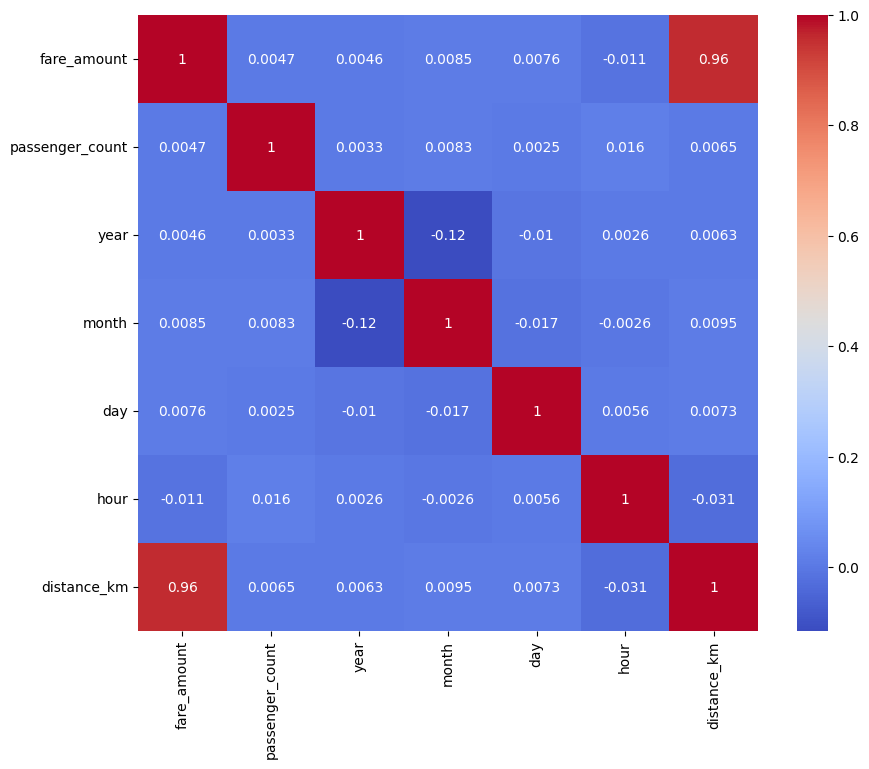

In [214]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
